In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def calculate_msi(time_series, num_intervals):
    interval_size = len(time_series) // num_intervals
    intervals = [time_series[i*interval_size:(i+1)*interval_size] for i in range(num_intervals)]

    means = np.array([interval.mean() for interval in intervals])
    variances = np.array([interval.var(ddof=1) for interval in intervals])

    overall_mean = time_series.mean()
    overall_variance = time_series.var(ddof=1)

    msi = np.sum((means - overall_mean)**2) / (num_intervals * overall_variance) + \
          np.sum((variances - overall_variance)**2) / (num_intervals * overall_variance**2)

    return msi

In [3]:
# Download S&P 500 historical data
ticker = "^GSPC"  # S&P 500 ticker symbol on Yahoo Finance
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date)
closing_prices = data['Close']

# Calculate the MSI
num_intervals = 10
msi = calculate_msi(closing_prices, num_intervals)
print(f"Mises Stationarity Index: {msi}")

[*********************100%%**********************]  1 of 1 completed

Mises Stationarity Index: 1.8312341424811374


[*********************100%%**********************]  1 of 1 completed


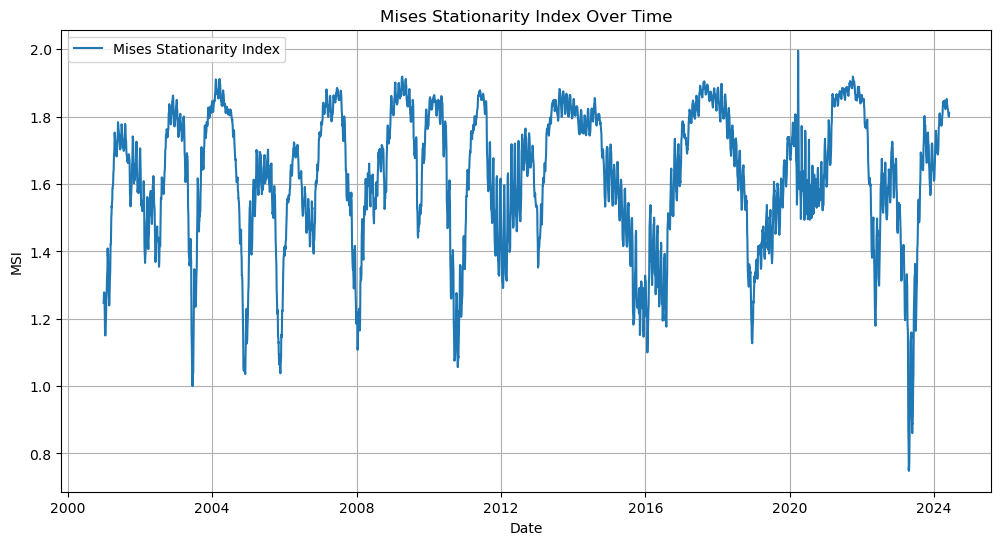

In [7]:
# Download S&P 500 historical data
ticker = "^GSPC"  # S&P 500 ticker symbol on Yahoo Finance
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date)
closing_prices = data['Close']

# Define rolling window size (e.g., 252 trading days for one year) and number of intervals
rolling_window_size = 252  # One year of trading days
num_intervals = 10

# Calculate MSI for each rolling window
msi_values = []
rolling_dates = []

for i in range(len(closing_prices) - rolling_window_size + 1):
    rolling_window = closing_prices[i:i + rolling_window_size]
    msi = calculate_msi(rolling_window, num_intervals)
    msi_values.append(msi)
    rolling_dates.append(closing_prices.index[i + rolling_window_size - 1])

# Create a DataFrame for plotting
msi_df = pd.DataFrame({'Date': rolling_dates, 'MSI': msi_values})
msi_df.set_index('Date', inplace=True)

# Plot MSI
plt.figure(figsize=(12, 6))
plt.plot(msi_df.index, msi_df['MSI'], label='Mises Stationarity Index')
plt.title('Mises Stationarity Index Over Time')
plt.xlabel('Date')
plt.ylabel('MSI')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
msi_df['MSI']

Date
2000-12-29    1.246849
2001-01-02    1.278412
2001-01-03    1.270749
2001-01-04    1.273187
2001-01-05    1.274528
                ...   
2024-05-24    1.805461
2024-05-28    1.800710
2024-05-29    1.799670
2024-05-30    1.805309
2024-05-31    1.811296
Name: MSI, Length: 5891, dtype: float64